# Jurasic Park Simulation

## Configuraciones globales

In [10]:
%pip install matplotlib numpy experta noise pandas seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from app.models.dinosaurios import *
from app.models.entorno import Entorno
from app.utils.draw_map import dibujar_mapa
from app.utils.batch_simulate import batch_simulate
from app.utils.genetic_algorithm import GeneticAlgorithm
from app.utils.procedural_algorithm import procedural_algorithm_for_generate_map

## Generación de mapa utilizando algoritmo procedural

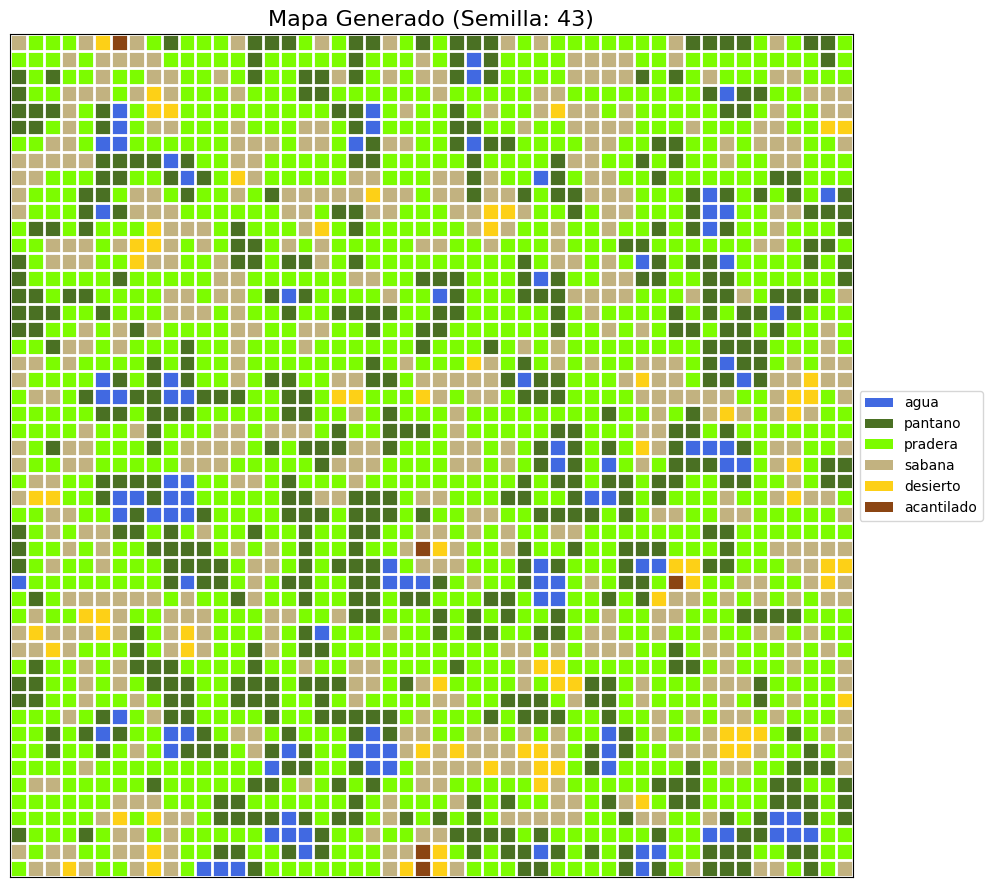

In [4]:
seeds = [43]
procedural_algorithm_for_generate_map(seeds)

### Seleccionar mapa

In [6]:
with open('app/data/map_seed_43.json', 'r') as file:
    mapa_data = json.load(file)

## Generar conjunto de personalidades utilizando mistral


#### [NOTA]
> Solo ejecute ésta sección si desea utilizar un nuevo mapa en vez del mapa por defecto.

### **Instalación**

In [54]:
%pip install python-dotenv mistralai

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [134]:
from dotenv import load_dotenv
from mistralai.client import MistralClient
from mistralai.models.chat_completion import ChatMessage
import os

from app.models.entorno import TERRENO_TIPOS

# Carga las variables de entorno desde el archivo .env
load_dotenv()

# Obtiene la API key de Mistral desde las variables de entorno
API_KEY = "7K5XJOFkbEEKjOkamr2GVneMiAQK5j75" # os.getenv("MISTRAL_API_KEY")

def get_mistral_response():
    # Prepara el mensaje a enviar basado en el input del usuario
    
    msg = """Genera un diccionario en Python que represente 5 personalidades diferentes para personajes de un juego de rol. 
    Cada personalidad debe tener tres habilidades: fuerza, velocidad, resistencia, inteligencia, adaptabilidad y supervivencia, 
    con valores entre 0 y 100. Además, proporciona un nombre descriptivo para cada personalidad. El diccionario debe tener la 
    siguiente estructura:

    {
    'habilidades': [
    {'fuerza': X, 'inteligencia': Y, 'resistencia': Z},
    {...},
    {...},
    {...},
    {...}
    ],
    'nombres': [
    'Nombre descriptivo 1',
    'Nombre descriptivo 2',
    'Nombre descriptivo 3',
    'Nombre descriptivo 4',
    'Nombre descriptivo 5'
    ]
    }

    Asegúrate de que los valores de las habilidades sean variados y que los nombres sean descriptivos de las 
    características principales de cada personalidad. Proporciona solo el diccionario en tu respuesta, sin 
    explicaciones adicionales, para que pueda ser parseado directamente con json.loads() en Python."""
    
    # Inicializa la lista de mensajes con el mensaje construido
    messages = [ChatMessage(role="user", content=msg)]
    
    # Crea una instancia del cliente de Mistral
    llm_client = MistralClient(api_key=API_KEY)
    
    # Inicializa la cadena de respuesta
    response = ""
    
    # Realiza la petición a Mistral y acumula las respuestas
    for chunk in llm_client.chat_stream(messages, model="mistral-small"):
        response += chunk.choices[0].delta.content

    return response


personalidades = get_mistral_response()

In [155]:
print(personalidades)

{
    "habilidades": [
        {
            "fuerza": 80,
            "velocidad": 60,
            "resistencia": 90,
            "inteligencia": 30,
            "adaptabilidad": 50,
            "supervivencia": 70
        },
        {
            "fuerza": 50,
            "velocidad": 90,
            "resistencia": 60,
            "inteligencia": 70,
            "adaptabilidad": 80,
            "supervivencia": 40
        },
        {
            "fuerza": 70,
            "velocidad": 70,
            "resistencia": 80,
            "inteligencia": 60,
            "adaptabilidad": 60,
            "supervivencia": 60
        },
        {
            "fuerza": 40,
            "velocidad": 100,
            "resistencia": 30,
            "inteligencia": 90,
            "adaptabilidad": 90,
            "supervivencia": 50
        },
        {
            "fuerza": 60,
            "velocidad": 50,
            "resistencia": 70,
            "inteligencia": 80,
            "adaptabilidad": 70,

In [23]:
import json

# personalidades_dict = json.loads(personalidades)
personalidades_dict = json.loads("""{
    "habilidades": [
        {
            "fuerza": 80,
            "velocidad": 60,
            "resistencia": 90,
            "inteligencia": 30,
            "adaptabilidad": 50,
            "supervivencia": 70
        },
        {
            "fuerza": 50,
            "velocidad": 90,
            "resistencia": 60,
            "inteligencia": 70,
            "adaptabilidad": 80,
            "supervivencia": 40
        },
        {
            "fuerza": 70,
            "velocidad": 70,
            "resistencia": 80,
            "inteligencia": 60,
            "adaptabilidad": 60,
            "supervivencia": 60
        },
        {
            "fuerza": 40,
            "velocidad": 100,
            "resistencia": 30,
            "inteligencia": 90,
            "adaptabilidad": 90,
            "supervivencia": 50
        },
        {
            "fuerza": 60,
            "velocidad": 50,
            "resistencia": 70,
            "inteligencia": 80,
            "adaptabilidad": 70,
            "supervivencia": 80
        }
    ],
    "nombres": [
        "El Bruto",
        "El Rápido",
        "El Resistente",
        "El Inteligente",
        "El Adaptable"
    ]
}""")
personalidades_dict['nombres'].reverse()

print(personalidades_dict)

{'habilidades': [{'fuerza': 80, 'velocidad': 60, 'resistencia': 90, 'inteligencia': 30, 'adaptabilidad': 50, 'supervivencia': 70}, {'fuerza': 50, 'velocidad': 90, 'resistencia': 60, 'inteligencia': 70, 'adaptabilidad': 80, 'supervivencia': 40}, {'fuerza': 70, 'velocidad': 70, 'resistencia': 80, 'inteligencia': 60, 'adaptabilidad': 60, 'supervivencia': 60}, {'fuerza': 40, 'velocidad': 100, 'resistencia': 30, 'inteligencia': 90, 'adaptabilidad': 90, 'supervivencia': 50}, {'fuerza': 60, 'velocidad': 50, 'resistencia': 70, 'inteligencia': 80, 'adaptabilidad': 70, 'supervivencia': 80}], 'nombres': ['El Adaptable', 'El Inteligente', 'El Resistente', 'El Rápido', 'El Bruto']}


## Simulaciones iniciales con valores aleatorios

In [7]:
def simulaciones_aleatorias(n_simulaciones, dinosaurios=[], reproduccion=True):

    entorno = Entorno(mapa_data['tamanio'], np.matrix(mapa_data['terreno']))

    resultados_sin_dinosaurios = batch_simulate(
        n_simulations=n_simulaciones,
        reproduccion=reproduccion,
        entorno=entorno
    )
    
    resultados_con_dinosaurios = batch_simulate(
        n_simulations=n_simulaciones,
        dinosaurios=dinosaurios,
        reproduccion=reproduccion,
        entorno=entorno
    )
        
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    
    for i, r in enumerate(resultados_sin_dinosaurios):
        ax1.plot(r['poblacion'], label=f'Simulacion {i + 1}', color='b')
        ax1.set_title('Prueba de supervivencia sin dinosaurios')
        ax1.set_xlabel('Ciclos')
        ax1.set_ylabel('Población')
        ax1.grid(True)
    
    for i, r in enumerate(resultados_con_dinosaurios):
        ax2.plot(r['poblacion'], label=f'Simulacion {i + 1}', color='r')
        ax2.set_title('Prueba de supervivencia con dinosaurios')
        ax2.set_xlabel('Ciclos')
        ax2.set_ylabel('Población')
        ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

### Simulación sin dinosaurios

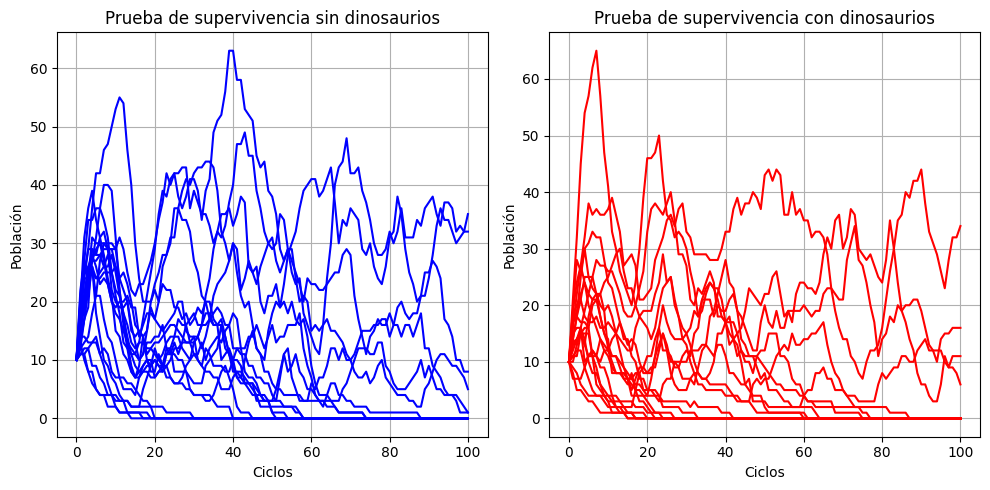

In [8]:
simulaciones_aleatorias(
    n_simulaciones=20,
    dinosaurios=[
        Braquiosaurio, Triceratops, Pteranodonte, Velociraptor, TiranosaurioRex
    ]
)

## Generar datos de simulaciones

### Instalar librerías necesarias

In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

from app.models.dinosaurios import *
from app.models.entorno import Entorno
from app.models.entorno import CLIMA_ESTADOS
from app.utils.draw_map import dibujar_mapa
from app.utils.batch_simulate import batch_simulate
from app.utils.batch_simulate import exportar_resultados
from app.utils.genetic_algorithm import GeneticAlgorithm
from app.utils.procedural_algorithm import procedural_algorithm_for_generate_map

# Configurar gráficos
sns.set(style="whitegrid")

### Cargar el mapa desde el json

In [2]:
with open('app/data/map_seed_43.json', 'r') as file:
    mapa_data = json.load(file)

### Ejecutar las simulaciones y almacenar los resultados

In [3]:
batch_results = []

In [4]:
resultados = batch_simulate(
    n_simulations=500,
    n_ciclos=100,
    n_humanos=10,
    dinosaurios=[Braquiosaurio, Triceratops, Pteranodonte, Velociraptor, TiranosaurioRex],
    reproduccion=True,
    entorno=Entorno(mapa_data['tamanio'], np.matrix(mapa_data['terreno'])),
    save_results=True,
)

batch_results.extend(resultados)

/home/dukagin/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/dukagin/.local/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


**Fijemos el clima en las siguientes simulaciones**

In [5]:
for clima in CLIMA_ESTADOS:
    resultados = batch_simulate(
        n_simulations=500,
        n_ciclos=100,
        n_humanos=10,
        dinosaurios=[Braquiosaurio, Triceratops, Pteranodonte, Velociraptor, TiranosaurioRex],
        reproduccion=True,
        entorno=Entorno(mapa_data['tamanio'], np.matrix(mapa_data['terreno'])),
        save_results=True,
        clima=clima
    )
    
    batch_results.extend(resultados)

In [6]:
exportar_resultados('app/data/resultados_simulacion.csv', batch_results)

### Cargar los datos desde el archivo CSV

In [7]:
df = pd.read_csv('app/data/resultados_simulacion.csv')

### Mostrar las primeras filas para verificar la carga correcta de datos

In [8]:
df.head()

,duracion_supervivencia,poblacion_inicial,poblacion_total,supervivencia_max,edad_promedio,salud_promedio,clima,terreno,genotipo_fuerza,genotipo_velocidad,genotipo_resistencia,genotipo_inteligencia,genotipo_adaptabilidad,genotipo_supervivencia
0,42,10,84,37,11.369048,100.341167,"{'tormenta', 'soleado', 'lluvioso'}","{'sabana', 'pantano', 'pradera', 'agua', 'acan...",64.0,6.0,9.0,9.0,7.0,8.0
1,59,10,174,31,9.310345,100.498518,"{'tormenta', 'soleado', 'lluvioso'}","{'sabana', 'pantano', 'pradera', 'agua', 'acan...",5.0,6.0,8.0,9.0,5.0,7.0
2,26,10,57,24,13.912281,100.403621,"{'tormenta', 'soleado', 'lluvioso'}","{'sabana', 'pantano', 'pradera', 'agua', 'acan...",19.0,6.0,8.0,9.0,6.0,6.0
3,100,10,288,33,7.451389,100.302569,"{'tormenta', 'soleado', 'lluvioso'}","{'sabana', 'pantano', 'pradera', 'agua', 'acan...",59.0,5.0,8.0,5.0,7.0,8.0
4,23,10,30,23,16.766667,100.292053,"{'tormenta', 'soleado', 'lluvioso'}","{'sabana', 'pantano', 'pradera', 'agua', 'acan...",33.0,9.0,6.0,8.0,8.0,9.0


### Limpieza de datos

Como podemos apreciar los datos de las columnas `clima` y `terreno` no son de tipo numéricos. Para corregirlos y poder procesarlos correctamente vamos a categorizarlos.

In [9]:
name_columns = ['clima', 'terreno']

for name in name_columns:
    df[name] = pd.Categorical(df[name])
    df[name] = df[name].cat.codes

In [10]:
df.head()

,duracion_supervivencia,poblacion_inicial,poblacion_total,supervivencia_max,edad_promedio,salud_promedio,clima,terreno,genotipo_fuerza,genotipo_velocidad,genotipo_resistencia,genotipo_inteligencia,genotipo_adaptabilidad,genotipo_supervivencia
0,42,10,84,37,11.369048,100.341167,3,16,64.0,6.0,9.0,9.0,7.0,8.0
1,59,10,174,31,9.310345,100.498518,3,16,5.0,6.0,8.0,9.0,5.0,7.0
2,26,10,57,24,13.912281,100.403621,3,16,19.0,6.0,8.0,9.0,6.0,6.0
3,100,10,288,33,7.451389,100.302569,3,16,59.0,5.0,8.0,5.0,7.0,8.0
4,23,10,30,23,16.766667,100.292053,3,16,33.0,9.0,6.0,8.0,8.0,9.0


### Mostrar estadísticas descriptivas de las variables

In [11]:
df.describe()

,duracion_supervivencia,poblacion_inicial,poblacion_total,supervivencia_max,edad_promedio,salud_promedio,clima,terreno,genotipo_fuerza,genotipo_velocidad,genotipo_resistencia,genotipo_inteligencia,genotipo_adaptabilidad,genotipo_supervivencia
count,2000.000000,2000.0,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.00000,2000.00000,2000.000000
mean,48.483000,10.0,98.540000,26.982000,15.931889,100.372616,2.499500,15.733000,52.358000,7.032000,7.00300,7.05450,7.00100,7.022000
std,28.020444,0.0,101.135615,9.653044,8.654893,0.078890,1.805721,2.883378,27.571361,1.405334,1.38237,1.41015,1.42127,1.423211
min,1.000000,10.0,10.000000,1.000000,7.010460,100.010998,0.000000,0.000000,5.000000,5.000000,5.00000,5.00000,5.00000,5.000000
25%,25.000000,10.0,31.000000,20.000000,9.866549,100.329956,0.750000,16.000000,28.000000,6.000000,6.00000,6.00000,6.00000,6.000000
50%,41.000000,10.0,62.000000,26.000000,12.937485,100.380657,2.000000,16.000000,52.500000,7.000000,7.00000,7.00000,7.00000,7.000000
75%,69.000000,10.0,132.000000,33.000000,18.807292,100.420653,4.250000,18.000000,76.000000,8.000000,8.00000,8.00000,8.00000,8.000000
max,100.000000,10.0,1049.000000,61.000000,54.500000,100.887982,5.000000,22.000000,99.000000,9.000000,9.00000,9.00000,9.00000,9.000000


### Hipótesis 1: La genética y las habilidades afectan significativamente la supervivencia.

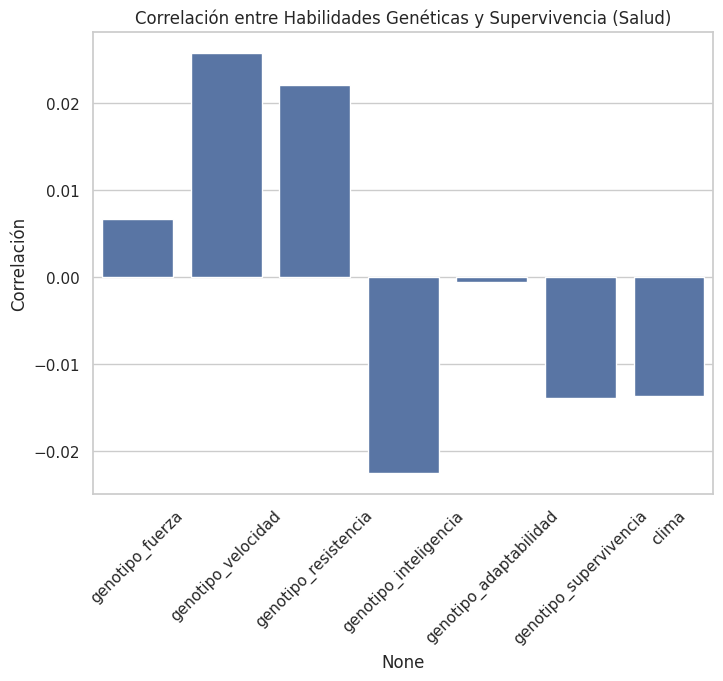

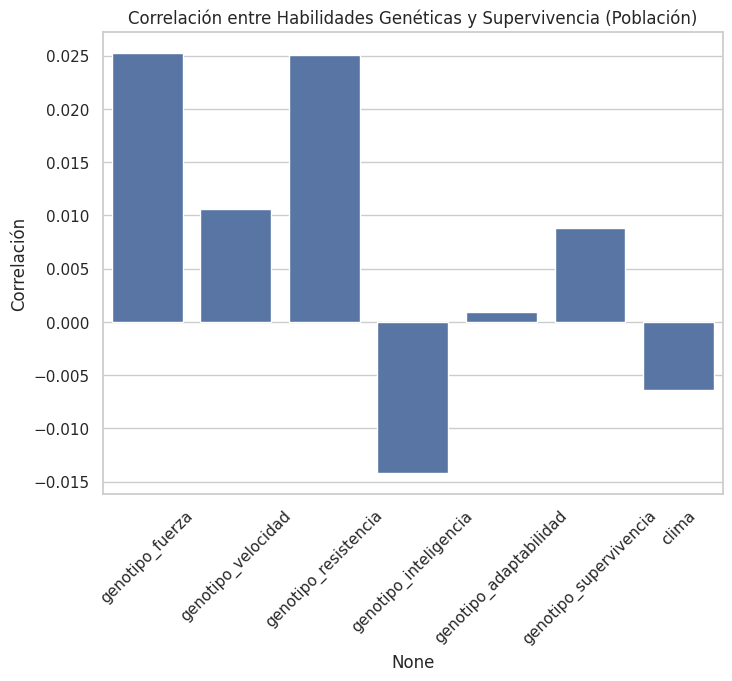

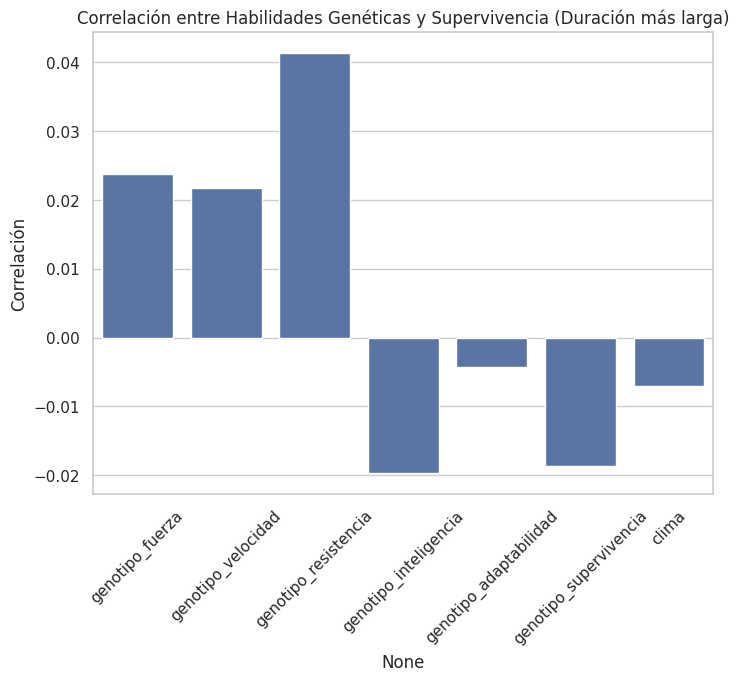

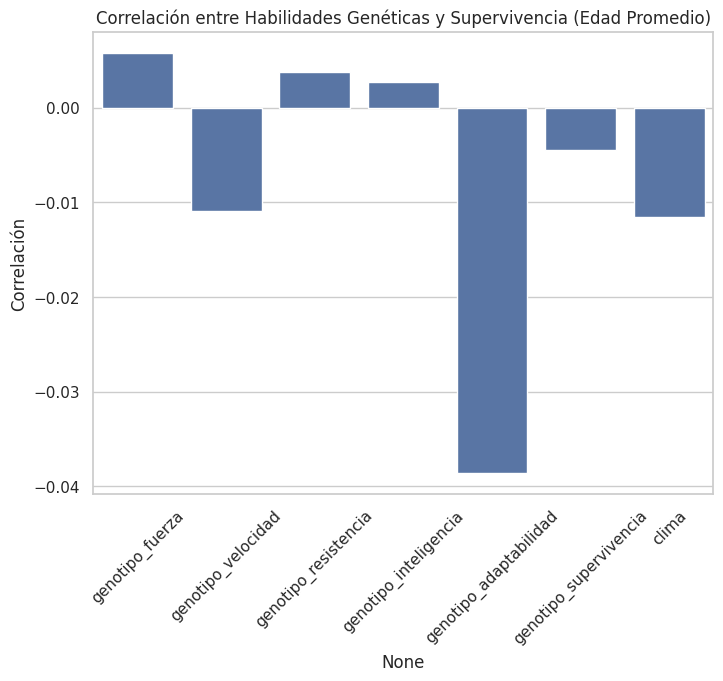

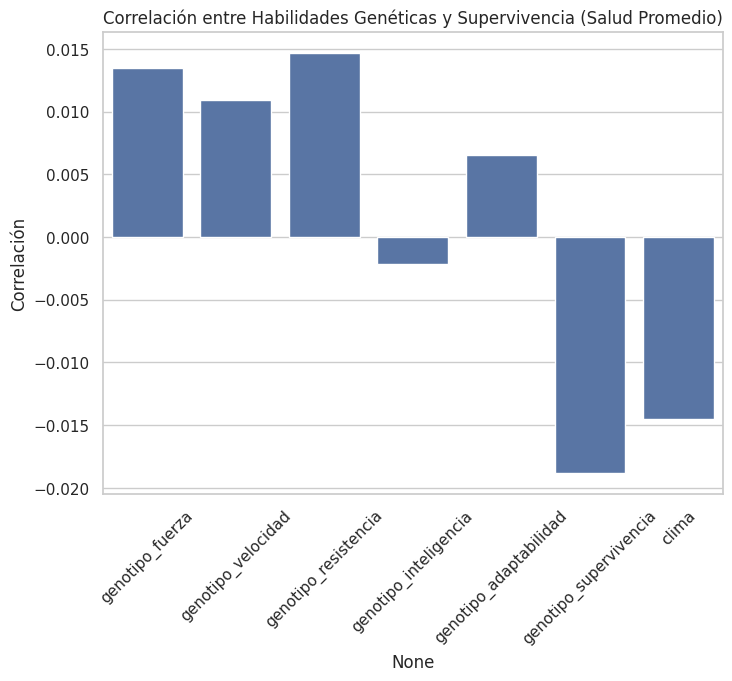

In [12]:
# Seleccionar las columnas genéticas y la columna de supervivencia (salud)
geneticas = ['genotipo_fuerza', 'genotipo_velocidad', 'genotipo_resistencia', 'genotipo_inteligencia', 'genotipo_adaptabilidad', 'genotipo_supervivencia', 'clima']
supervivencia = df['supervivencia_max']
poblacion = df['poblacion_total']
duracion_supervivencia = df['duracion_supervivencia']
edad_promedio = df['edad_promedio']
salud_promedio = df['salud_promedio']

# Calcular la correlación entre las habilidades genéticas y la salud (supervivencia)
correlaciones_geneticas = df[geneticas].corrwith(supervivencia)

# Visualizar las correlaciones
plt.figure(figsize=(8, 6))
sns.barplot(x=correlaciones_geneticas.index, y=correlaciones_geneticas.values)
plt.title('Correlación entre Habilidades Genéticas y Supervivencia (Salud)')
plt.ylabel('Correlación')
plt.xticks(rotation=45)
plt.show()


# Calcular la correlación entre las habilidades genéticas y la salud (Poblacion)
correlaciones_geneticas = df[geneticas].corrwith(poblacion)

# Visualizar las correlaciones
plt.figure(figsize=(8, 6))
sns.barplot(x=correlaciones_geneticas.index, y=correlaciones_geneticas.values)
plt.title('Correlación entre Habilidades Genéticas y Supervivencia (Población)')
plt.ylabel('Correlación')
plt.xticks(rotation=45)
plt.show()


# Calcular la correlación entre las habilidades genéticas y la salud (Poblacion)
correlaciones_geneticas = df[geneticas].corrwith(duracion_supervivencia)

# Visualizar las correlaciones
plt.figure(figsize=(8, 6))
sns.barplot(x=correlaciones_geneticas.index, y=correlaciones_geneticas.values)
plt.title('Correlación entre Habilidades Genéticas y Supervivencia (Duración más larga)')
plt.ylabel('Correlación')
plt.xticks(rotation=45)
plt.show()


# Calcular la correlación entre las habilidades genéticas y la salud (edad_promedio)
correlaciones_geneticas = df[geneticas].corrwith(edad_promedio)

# Visualizar las correlaciones
plt.figure(figsize=(8, 6))
sns.barplot(x=correlaciones_geneticas.index, y=correlaciones_geneticas.values)
plt.title('Correlación entre Habilidades Genéticas y Supervivencia (Edad Promedio)')
plt.ylabel('Correlación')
plt.xticks(rotation=45)
plt.show()


# Calcular la correlación entre las habilidades genéticas y la salud (salud_promedio)
correlaciones_geneticas = df[geneticas].corrwith(salud_promedio)

# Visualizar las correlaciones
plt.figure(figsize=(8, 6))
sns.barplot(x=correlaciones_geneticas.index, y=correlaciones_geneticas.values)
plt.title('Correlación entre Habilidades Genéticas y Supervivencia (Salud Promedio)')
plt.ylabel('Correlación')
plt.xticks(rotation=45)
plt.show()



### Hipótesis 2: La adaptabilidad mejora la capacidad de supervivencia en entornos cambiantes.

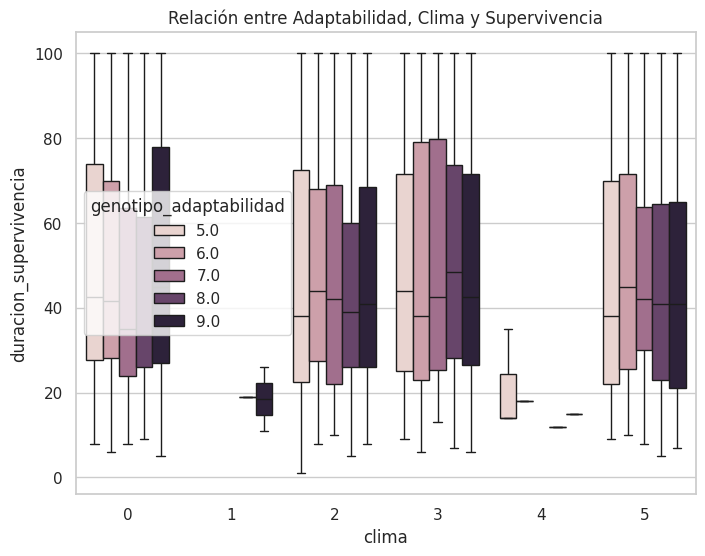

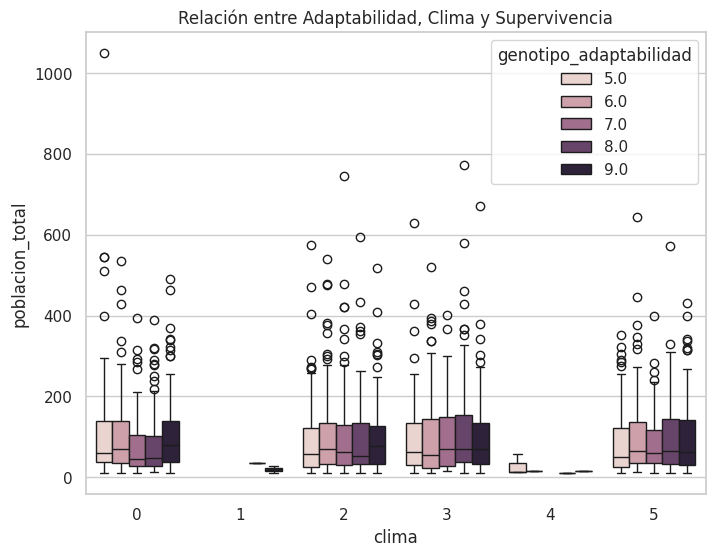

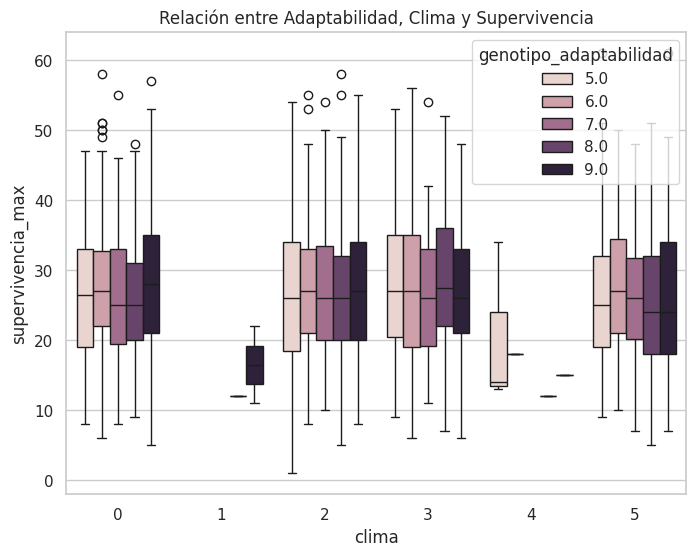

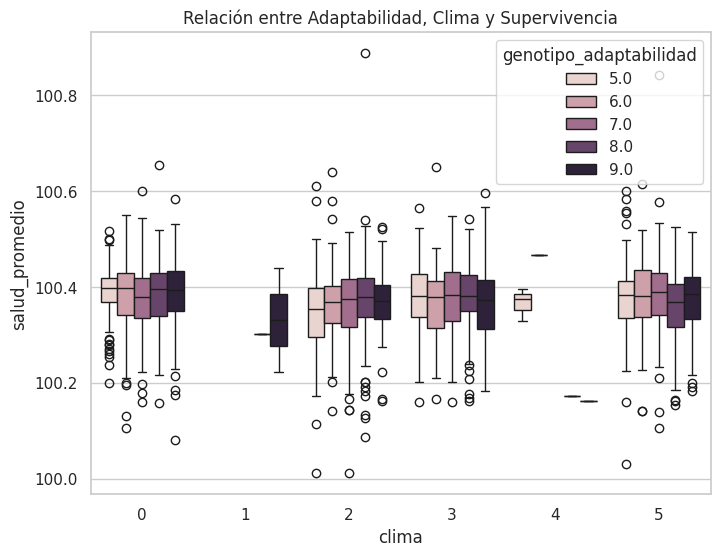

In [13]:
for col in ('duracion_supervivencia', 'poblacion_total', 'supervivencia_max', 'salud_promedio'):
    # Relación entre adaptabilidad y salud en diferentes climas
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='clima', y=col, hue='genotipo_adaptabilidad', data=df)
    plt.title('Relación entre Adaptabilidad, Clima y Supervivencia')
    plt.show()

### Hipótesis 3: ¿Cuáles variables aportan más peso a la supervivencia?

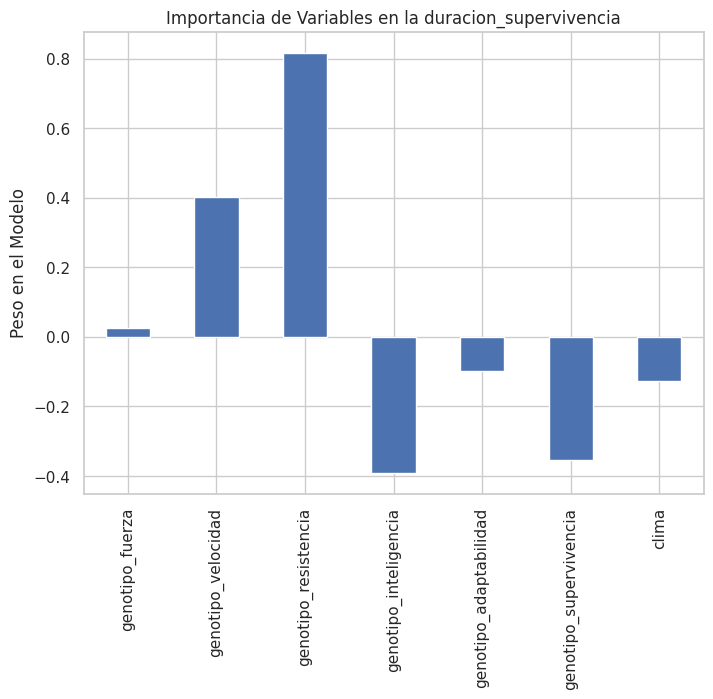

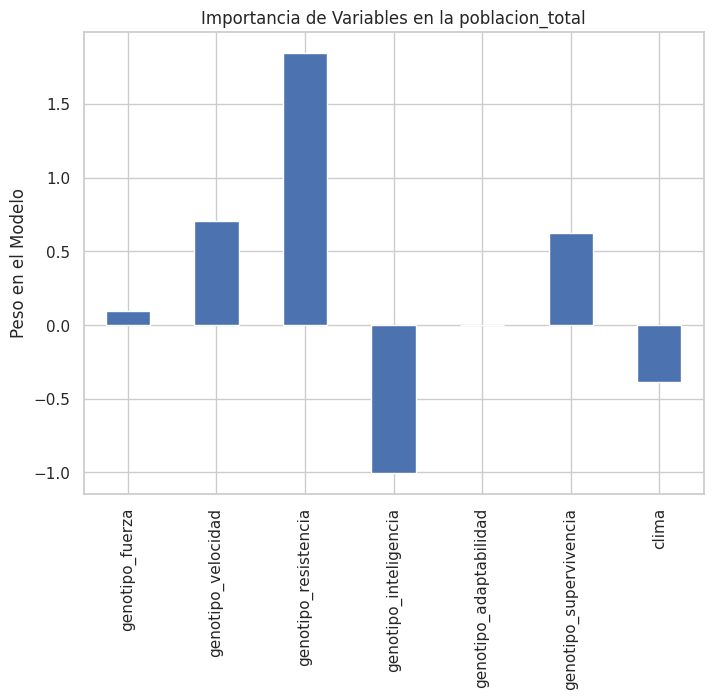

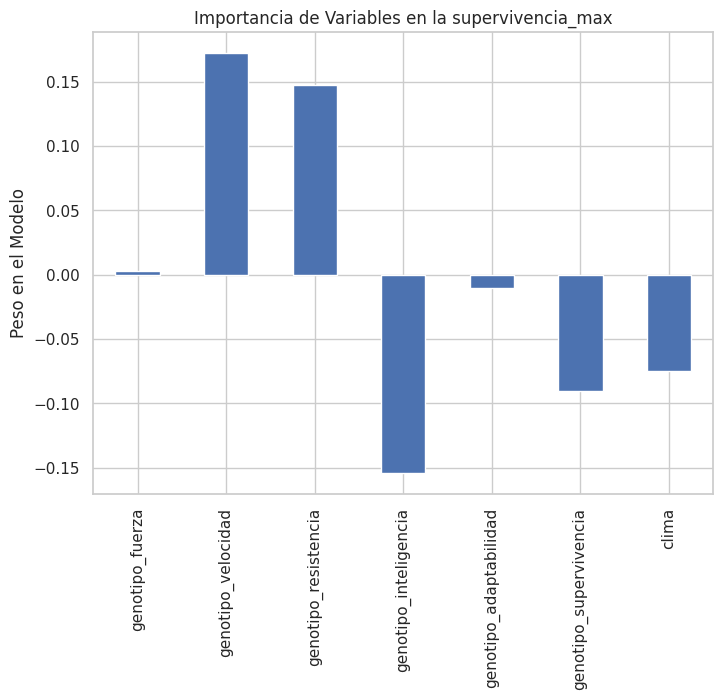

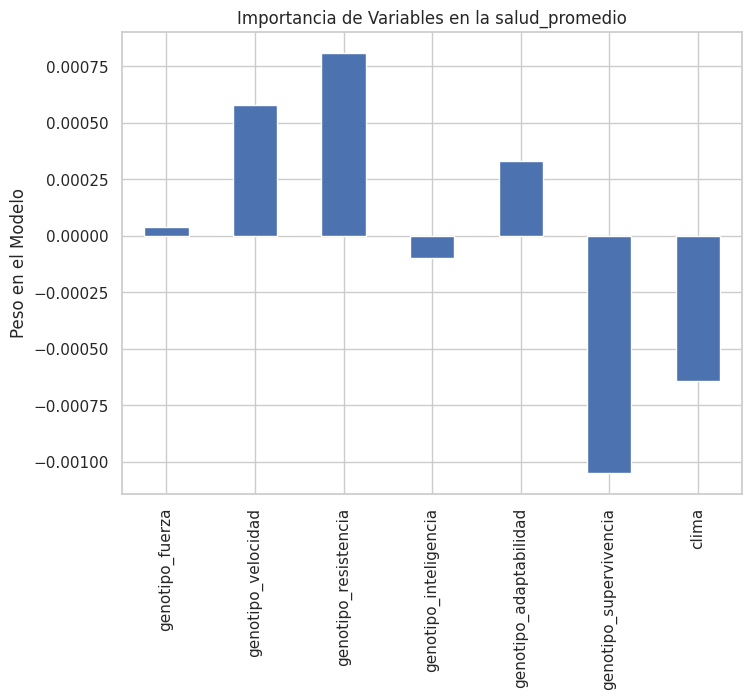

In [14]:
for col in ('duracion_supervivencia', 'poblacion_total', 'supervivencia_max', 'salud_promedio'):
    # Variables predictoras y variable objetivo
    X = df[geneticas]
    y = df[col]

    # Ajustar un modelo de regresión lineal
    model = LinearRegression()
    model.fit(X, y)

    # Mostrar los coeficientes de cada variable
    coeficientes = pd.Series(model.coef_, index=X.columns)

    # Visualizar los coeficientes
    plt.figure(figsize=(8, 6))
    coeficientes.plot(kind='bar')
    plt.title(f'Importancia de Variables en la {col}')
    plt.ylabel('Peso en el Modelo')
    plt.show()

### Edad Promedio de Vida

In [15]:
# Calcular la edad promedio de vida
edad_promedio = df['edad_promedio'].mean()
print(f'La edad promedio de vida es: {edad_promedio:.2f} años')

La edad promedio de vida es: 15.93 años


### ¿Cómo afecta el clima y el terreno en la supervivencia y en la toma de decisiones?

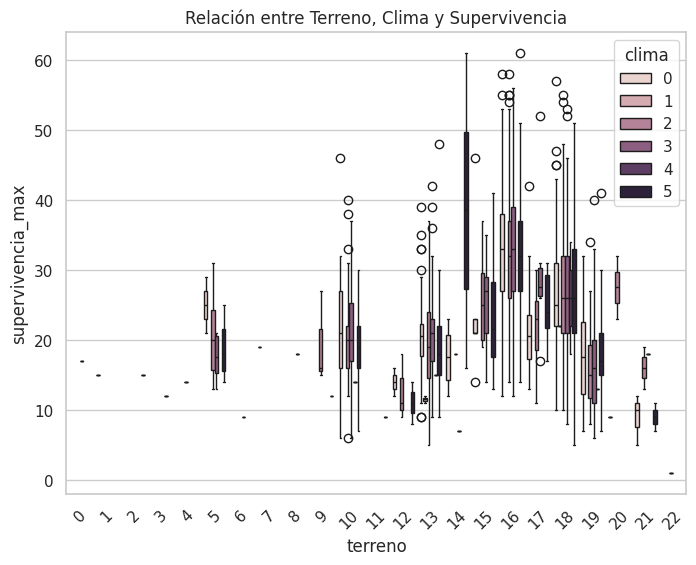

In [16]:
# Relación entre terreno y salud
plt.figure(figsize=(8, 6))
sns.boxplot(x='terreno', y='supervivencia_max', hue='clima', data=df)
plt.title('Relación entre Terreno, Clima y Supervivencia')
plt.xticks(rotation=45)
plt.show()

### Correlación entre Variables

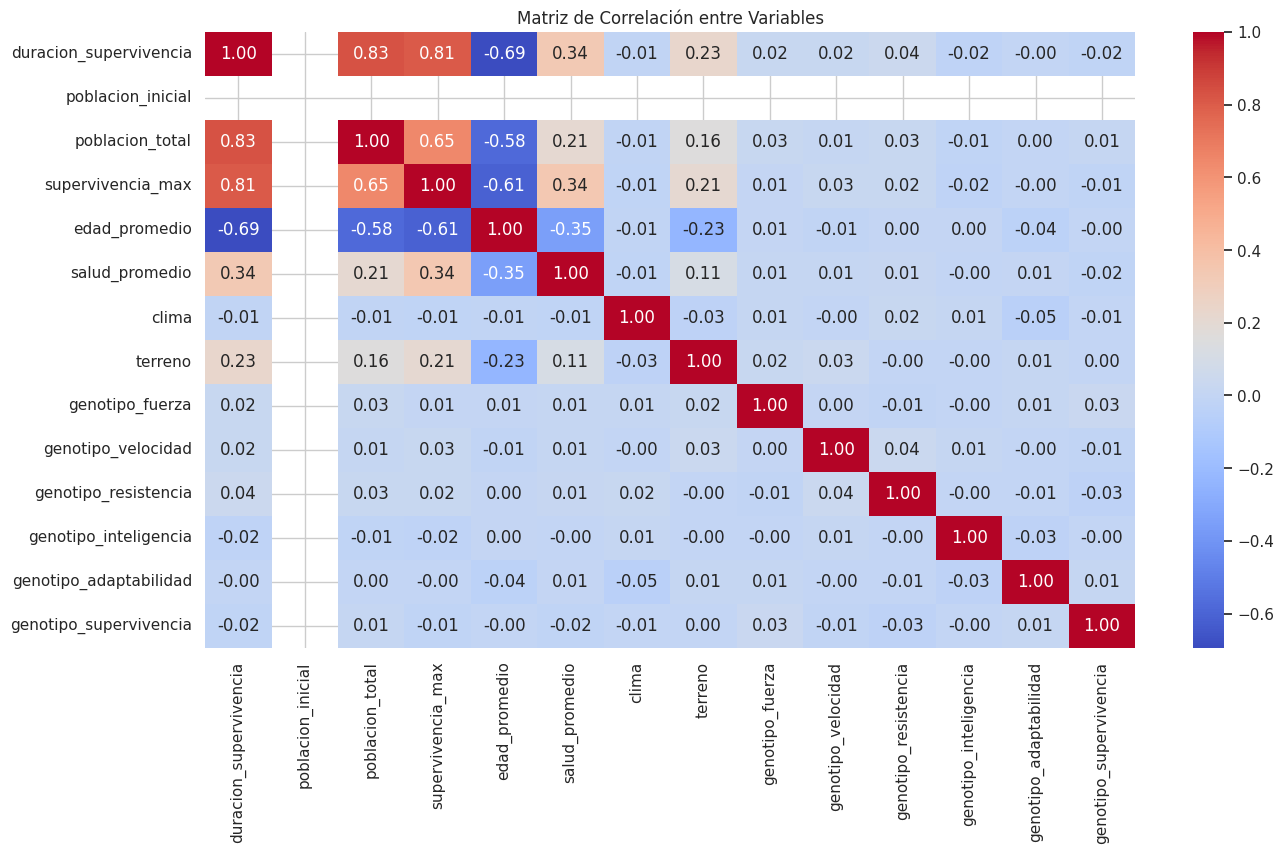

In [17]:
# Matriz de correlación
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación entre Variables')
plt.show()

### Promedio de salud por clima

clima
0    48.482000
1    18.666667
2    48.079840
3    50.387755
4    18.000000
5    47.566000
Name: duracion_supervivencia, dtype: float64


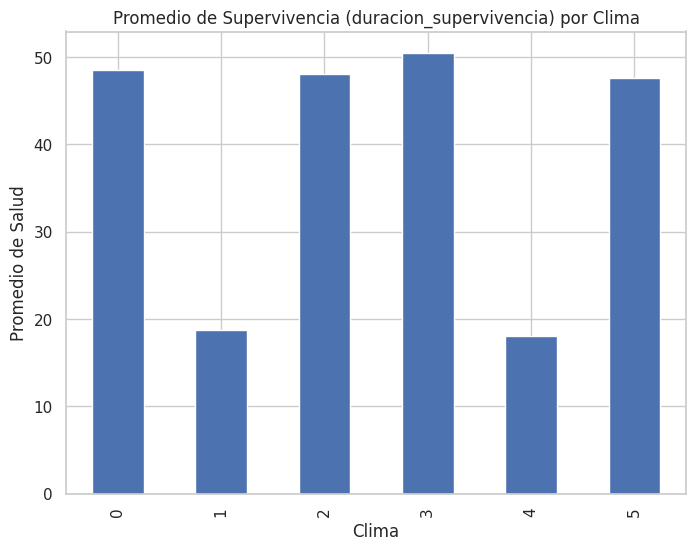

clima
0     96.820000
1     24.666667
2     99.249501
3    105.614286
4     20.666667
5     93.994000
Name: poblacion_total, dtype: float64


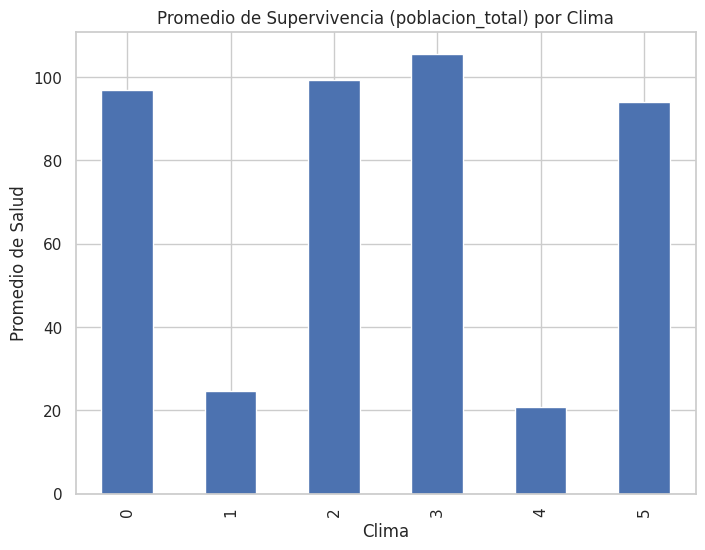

clima
0    27.028000
1    15.000000
2    26.952096
3    27.597959
4    17.666667
5    26.546000
Name: supervivencia_max, dtype: float64


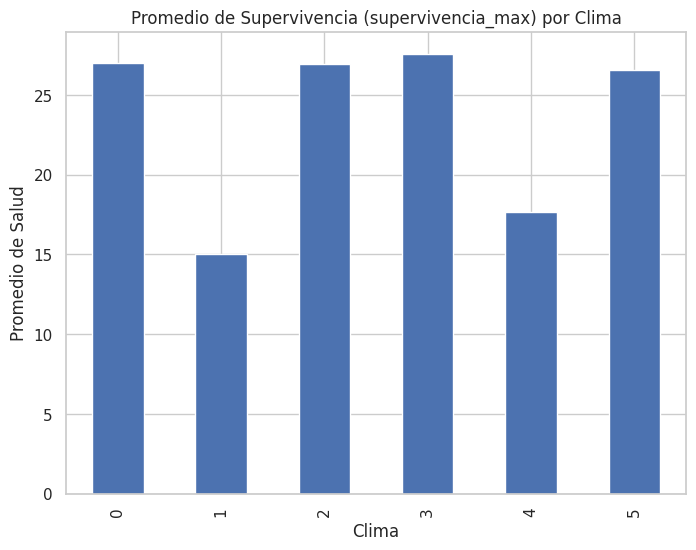

clima
0    100.380880
1    100.321591
2    100.362203
3    100.372690
4    100.316922
5    100.375690
Name: salud_promedio, dtype: float64


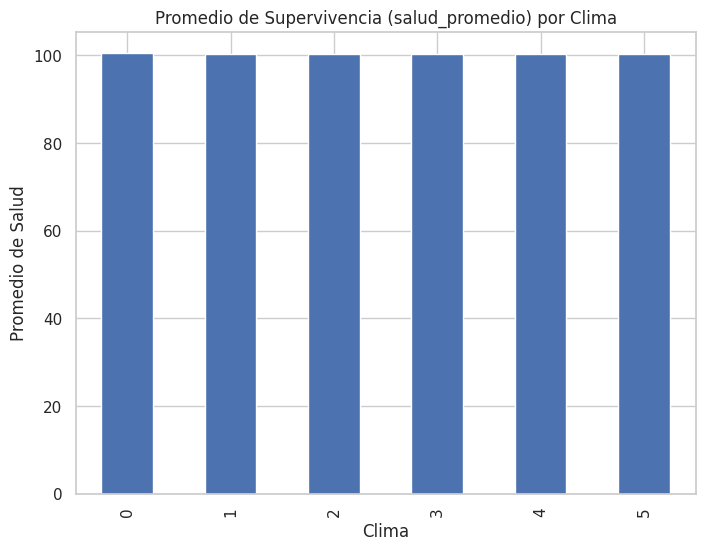

In [18]:
for col in ('duracion_supervivencia', 'poblacion_total', 'supervivencia_max', 'salud_promedio'):

    # Promedio de salud
    promedio_salud_por_clima = df.groupby('clima')[col].mean()

    print(promedio_salud_por_clima)

    # Visualización de los promedios
    plt.figure(figsize=(8, 6))
    promedio_salud_por_clima.plot(kind='bar')
    plt.title(f'Promedio de Supervivencia ({col}) por Clima')
    plt.ylabel('Promedio de Salud')
    plt.xlabel('Clima')
    plt.show()

In [19]:
from scipy.stats import f_oneway


for col in ('duracion_supervivencia', 'poblacion_total', 'supervivencia_max', 'salud_promedio'):

    # Obtener las columnas de salud para cada clima
    salud_soleado = df[df['clima'] == 1][col]
    salud_tormenta = df[df['clima'] == 2][col]
    salud_lluvioso = df[df['clima'] == 3][col]

    # ANOVA para comparar la supervivencia en diferentes climas
    anova_result = f_oneway(salud_soleado, salud_tormenta, salud_lluvioso)

    print(f'Datos para {col} => F-statistic: {anova_result.statistic:.2f}, p-value: {anova_result.pvalue:.4f}')


Datos para duracion_supervivencia => F-statistic: 2.58, p-value: 0.0765
Datos para poblacion_total => F-statistic: 1.26, p-value: 0.2836
Datos para supervivencia_max => F-statistic: 3.00, p-value: 0.0504
Datos para salud_promedio => F-statistic: 2.66, p-value: 0.0706


Como el valor del p-value no es menor que 0.05 entonces podemos conlcuir que las diferencias en la supervivencia, población total y salud promedio entre los climas no son significativas.

## Hipótesis 1: La genética y las habilidades afectan significativamente la supervivencia

In [27]:
def batch_simulate_genotipos(n_simulaciones, dinosaurios=[], reproduccion=True):
    resultados_batch = []
    
    genotipos_config = personalidades_dict["habilidades"]

    entorno = Entorno(mapa_data['tamanio'], np.matrix(mapa_data['terreno']))

    for genotipo in genotipos_config:
        poblacion_final = []

        results = batch_simulate(
            n_simulations=n_simulaciones,
            genotipo_input=genotipo,
            dinosaurios=dinosaurios,
            reproduccion=reproduccion,
            entorno=entorno
        )

        for i, result in enumerate(results):
            poblacion_final.append(result['poblacion'][-1])  # Población al final de la simulación

        # Guardar los resultados de cada configuración de genotipo
        resultados_batch.append({
            'genotipo': genotipo,
            'poblacion': result['poblacion'],
            'results': results,
            'poblacion_final': np.mean(poblacion_final)
        })

    return resultados_batch


In [28]:
def visualizar_resultados_batch(resultados_batch):
    # Extraer la información para graficar
    # genotipos = ["Humanos fuertes", "Humanos inteligentes", "Humanos balanceados", "Humanos resistentes"]
    genotipos = personalidades_dict["nombres"]
    poblacion_final = [r['poblacion_final'] for r in resultados_batch]

    # Crear gráfico de barras para visualizar la hipótesis
    plt.figure(figsize=(10, 6))
    plt.bar(genotipos, poblacion_final)
    plt.title('Efecto de Genotipos en la Supervivencia')
    plt.xlabel('Genotipo (Fuerza, Inteligencia, Resistencia)')
    plt.ylabel('Población Final Promedio')
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


### Hagamos una primera simulacion sin dinosaurios y veamos los resultados.

In [29]:
# Ejecutar simulacion sin dinosaurios
resultados_batch = batch_simulate_genotipos(
    n_simulaciones=50,
)

/home/dukagin/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/dukagin/.local/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


KeyError: 'poblacion'

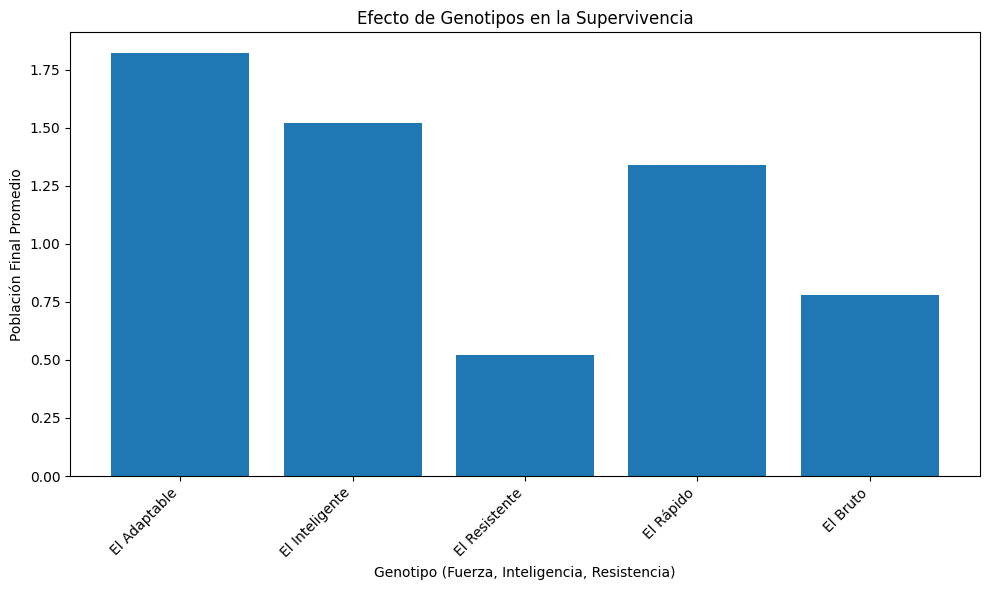

In [ ]:
# Visualizar los resultados
visualizar_resultados_batch(resultados_batch)

### Ahora hagamos una simulación agregando los dinosaurios al ecosistema

In [ ]:
# Ejecutar simulaciones con dinosaurios
resultados_batch_dinosaurios = batch_simulate_genotipos(
    n_simulaciones=50,
    dinosaurios=[
        Braquiosaurio, Triceratops, Pteranodonte, Velociraptor, TiranosaurioRex
    ]
)

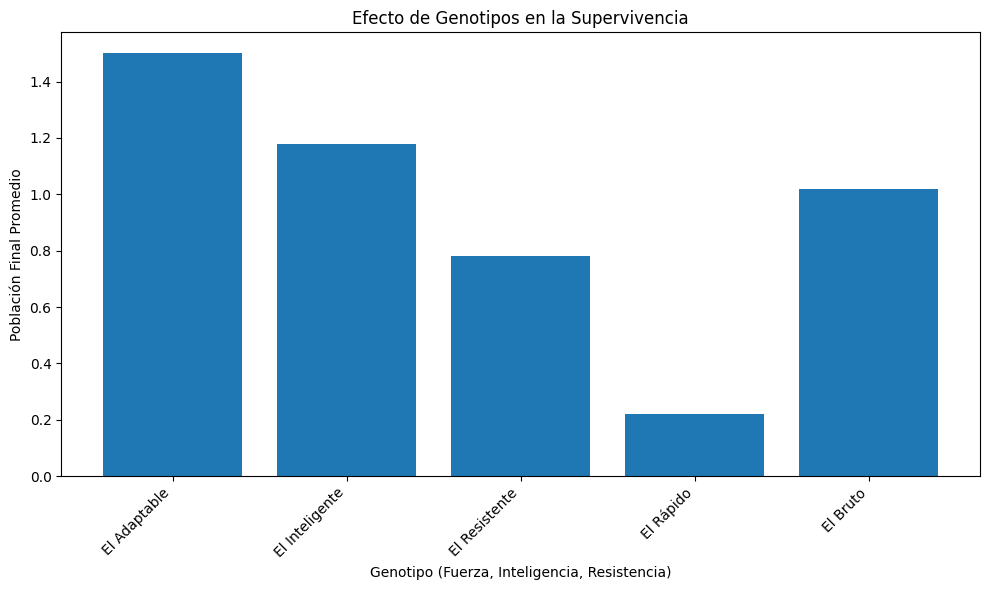

In [ ]:
visualizar_resultados_batch(resultados_batch_dinosaurios)

## Hipótesis 2: La adaptabilidad mejora la capacidad de supervivencia en entornos cambiantes

In [47]:
def evaluar_hipotesis_adaptabilidad(n_simulaciones, dinosaurios=[], reproduccion=True):

    entorno = Entorno(mapa_data['tamanio'], np.matrix(mapa_data['terreno']))

    # Simulamos tres escenarios con diferentes niveles de adaptabilidad
    resultados_baja = batch_simulate(
        n_simulations=n_simulaciones,
        genotipo={'adaptabilidad': 20},
        dinosaurios=dinosaurios,
        reproduccion=reproduccion,
        entorno=entorno
    )
    resultados_media = batch_simulate(
        n_simulations=n_simulaciones,
        genotipo={'adaptabilidad': 50},
        dinosaurios=dinosaurios,
        reproduccion=reproduccion,
        entorno=entorno
    )
    resultados_alta = batch_simulate(
        n_simulations=n_simulaciones,
        genotipo={'adaptabilidad': 80},
        dinosaurios=dinosaurios,
        reproduccion=reproduccion,
        entorno=entorno
    )

    # Graficar los resultados
    plt.figure(figsize=(10, 6))
    for r in resultados_baja:
        plt.plot(r['poblacion'], label='Adaptabilidad Baja', color='r')

    for r in resultados_media:
        plt.plot(r['poblacion'], label='Adaptabilidad Media', color='g')

    for r in resultados_alta:
        plt.plot(r['poblacion'], label='Adaptabilidad Alta', color='b')

    plt.title('Supervivencia vs Ciclos con Diferentes Niveles de Adaptabilidad')
    plt.xlabel('Ciclos')
    plt.ylabel('Población')
    plt.legend()
    plt.grid(True)
    plt.show()


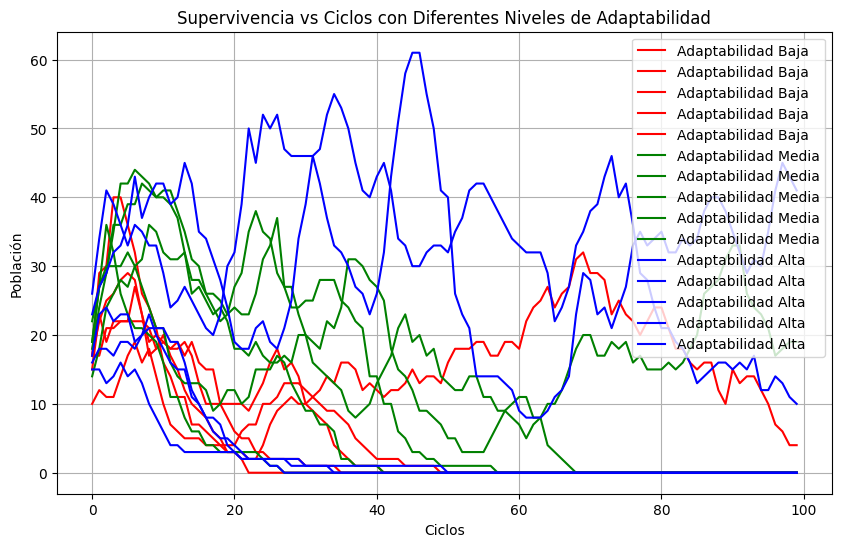

In [48]:
evaluar_hipotesis_adaptabilidad(
    n_simulaciones=5,
    dinosaurios=[
        Braquiosaurio, Triceratops, Pteranodonte, Velociraptor, TiranosaurioRex
    ]
)

## Algoritmo Genético

In [20]:
entorno = Entorno(mapa_data['tamanio'], np.matrix(mapa_data['terreno']))

genetic_algorithm = GeneticAlgorithm(
    dinosaurios=[
        Braquiosaurio, Triceratops, Pteranodonte, Velociraptor, TiranosaurioRex
    ],
    entorno=entorno
)

In [21]:
genetic_algorithm.evolucionar()
genetic_algorithm.seleccion()

In [22]:
print(genetic_algorithm.poblacion[0].genotipo)

{'fuerza': 65, 'velocidad': 12, 'resistencia': 24, 'inteligencia': 66, 'adaptabilidad': 16, 'supervivencia': 36}


In [50]:
genetic_algorithm.evolucionar()
genetic_algorithm.seleccion()
print(genetic_algorithm.poblacion[0].genotipo)

{'fuerza': 63, 'velocidad': 76, 'resistencia': 15, 'inteligencia': 4, 'adaptabilidad': 56, 'supervivencia': 90}


### Comprobando resultados anteriores

In [49]:
def evaluar_hipotesis_adaptabilidad(n_simulaciones, dinosaurios=[], reproduccion=True):

    entorno = Entorno(mapa_data['tamanio'], np.matrix(mapa_data['terreno']))

    # Simulamos tres escenarios con diferentes niveles de adaptabilidad
    resultados = batch_simulate(
        n_simulations=n_simulaciones,
        # genotipo={'fuerza': 24, 'velocidad': 36, 'resistencia': 71, 'inteligencia': 67, 'adaptabilidad': 77, 'supervivencia': 62},
        genotipo={'fuerza': 65, 'velocidad': 12, 'resistencia': 24, 'inteligencia': 66, 'adaptabilidad': 16, 'supervivencia': 36},
        dinosaurios=dinosaurios,
        reproduccion=reproduccion,
        entorno=entorno
    )
    
    # Graficar los resultados
    plt.figure(figsize=(10, 6))
    for i, r in enumerate(resultados):
        plt.plot(r['poblacion'], label=f'Simulacion {i + 1}', color='b')

    plt.title('Prueba de los índices genéticos encontrados por el AG')
    # plt.subtitle("'fuerza': 24, 'velocidad': 36, 'resistencia': 71, 'inteligencia': 67, 'adaptabilidad': 77, 'supervivencia': 62")
    plt.xlabel('Ciclos')
    plt.ylabel('Población')
    # plt.legend()
    plt.grid(True)
    plt.show()

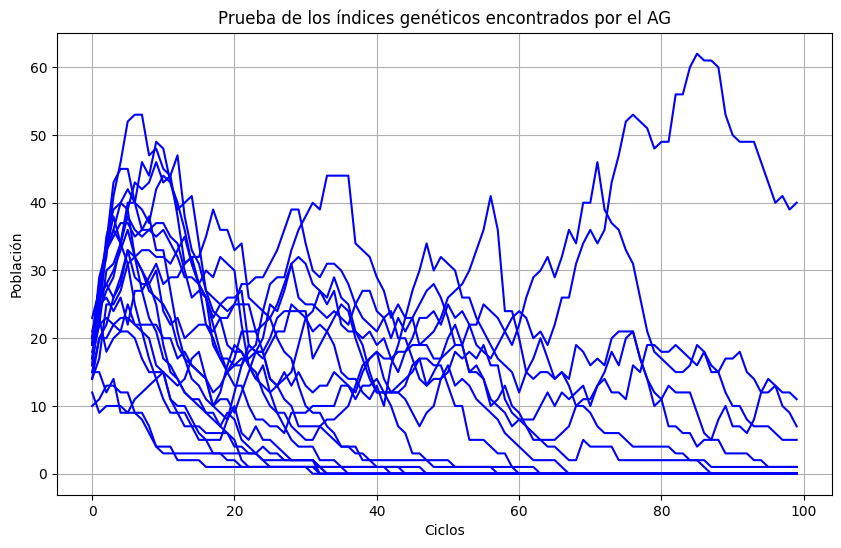

In [28]:
evaluar_hipotesis_adaptabilidad(
    n_simulaciones=20,
    dinosaurios=[
        Braquiosaurio, Triceratops, Pteranodonte, Velociraptor, TiranosaurioRex
    ]
)

### Otro algoritmo Genético

In [51]:
def evaluar_hipotesis_adaptabilidad(n_simulaciones, dinosaurios=[], reproduccion=True):

    entorno = Entorno(mapa_data['tamanio'], np.matrix(mapa_data['terreno']))

    # Simulamos tres escenarios con diferentes niveles de adaptabilidad
    resultados = batch_simulate(
        n_simulations=n_simulaciones,
        # genotipo={'fuerza': 65, 'velocidad': 12, 'resistencia': 24, 'inteligencia': 66, 'adaptabilidad': 16, 'supervivencia': 36},
        genotipo={'fuerza': 63, 'velocidad': 76, 'resistencia': 15, 'inteligencia': 4, 'adaptabilidad': 56, 'supervivencia': 90},
        dinosaurios=dinosaurios,
        reproduccion=reproduccion,
        entorno=entorno
    )
    
    # Graficar los resultados
    plt.figure(figsize=(10, 6))
    for i, r in enumerate(resultados):
        plt.plot(r['poblacion'], label=f'Simulacion {i + 1}', color='b')

    plt.title('Prueba de los índices genéticos encontrados por el AG')
    # plt.subtitle("'fuerza': 24, 'velocidad': 36, 'resistencia': 71, 'inteligencia': 67, 'adaptabilidad': 77, 'supervivencia': 62")
    plt.xlabel('Ciclos')
    plt.ylabel('Población')
    # plt.legend()
    plt.grid(True)
    plt.show()

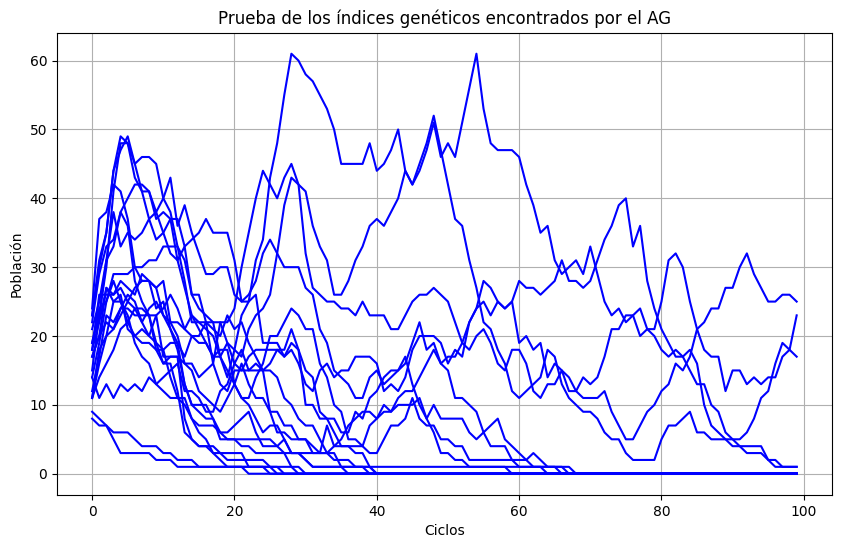

In [52]:
evaluar_hipotesis_adaptabilidad(
    n_simulaciones=20,
    dinosaurios=[
        Braquiosaurio, Triceratops, Pteranodonte, Velociraptor, TiranosaurioRex
    ]
)